In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(r'C:\Users\Admin\Desktop\Havartechs\Projects\Telecommunication\Tellco_Analysis\scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helper import TelecomHelper
%matplotlib inline

import plotly.express as px
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
CSV_PATH = r"C:\Users\Admin\Desktop\Havartechs\Projects\Telecommunication\Tellco_Analysis\Data\cleaned_data.csv"

In [3]:
TelecomHelper = TelecomHelper()

In [4]:
df = TelecomHelper.read_csv(csv_path=CSV_PATH)

file read as csv


In [5]:
print(f"The percentage of data missing is: {TelecomHelper.percent_missing(df)}")

The percentage of data missing is: 0.0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   dur._(ms)                                 146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn/number                             146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

In [7]:
renamed_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })


In [8]:
renamed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   duration                                  146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn                                    146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

In [9]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360313e+10,12
3.376041e+10,12


In [10]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0
3.376041e+10,5321667.0


In [11]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

,total_data
msisdn,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


In [12]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)
    

In [13]:
engagment_metrics = renamed_df.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagment_metrics = engagment_metrics.rename(columns={'bearer_id': 'sessions_frequency', 'total_data': 'total_traffic'})
engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False).head(10)

,sessions_frequency,duration,total_traffic
msisdn,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.376041e+10,12,5321667.0,7.132371e+09


In [14]:
engagment_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,1.057190e+05,1.057190e+05
mean,1.389447,1.462114e+05,6.888661e+08
std,0.796173,1.845391e+05,4.869964e+08
min,1.000000,7.142000e+03,3.324901e+07
25%,1.000000,7.272900e+04,3.579501e+08
50%,1.000000,1.031110e+05,6.169335e+08
75%,2.000000,1.727990e+05,8.564738e+08
max,18.000000,1.855375e+07,8.846226e+09


In [15]:
class plots:
    
    def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
        plt.figure(figsize=(9, 7))
        sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
        plt.title(f'Distribution of {column}', size=20, fontweight='bold')
        plt.show()

    def plot_dist(df:pd.DataFrame, column:str):
        plt.figure(figsize=(9,7))
        sns.distplot(df).set_title(f'Distribution of {column}')
        plt.show()


    def plot_count(df:pd.DataFrame, column:str) -> None:
        plt.figure(figsize=(12, 7))
        sns.countplot(data=df, x=column)
        plt.title(f'Plot count of {column}', size=20, fontweight='bold')
        plt.show()

    def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
        plt.figure(figsize=(12, 7))
        sns.barplot(data = df, x=x_col, y=y_col)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks( fontsize=14)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)
        plt.show()

    def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
        plt.figure(figsize=(12, 7))
        sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
        plt.title(title, size=18, fontweight='bold')
        plt.show()

    def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
        plt.figure(figsize=(12, 7))
        sns.boxplot(data = df, x=x_col)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.show()

    def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
        plt.figure(figsize=(12, 7))
        sns.boxplot(data = df, x=x_col, y=y_col)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks( fontsize=14)
        plt.show()

    def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
        plt.title(title, size=20)
        plt.xticks(fontsize=14)
        plt.yticks( fontsize=14)
        plt.show()

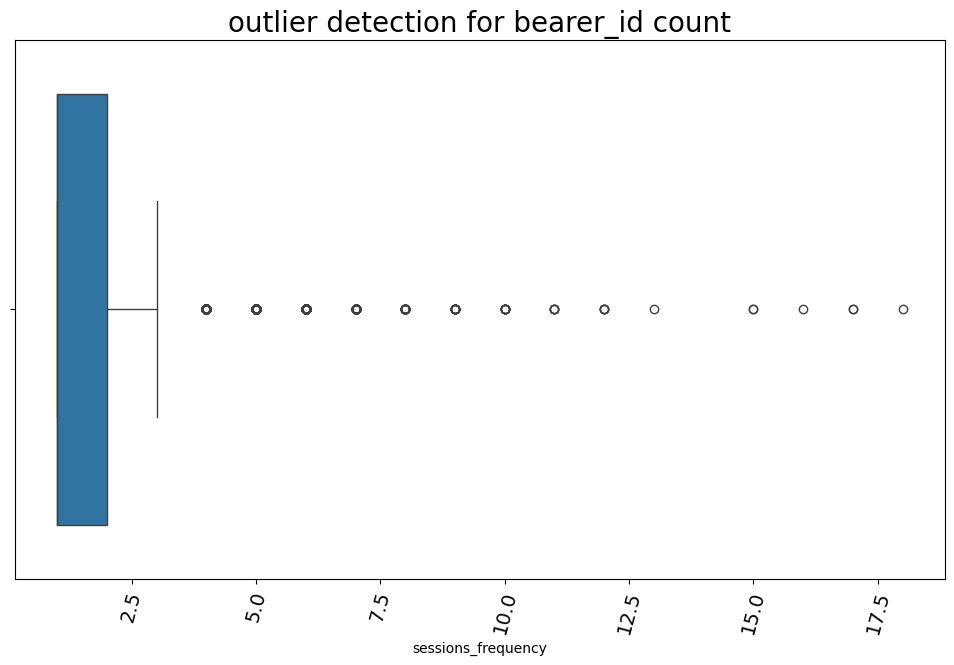

In [16]:
plots.plot_box(engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count')


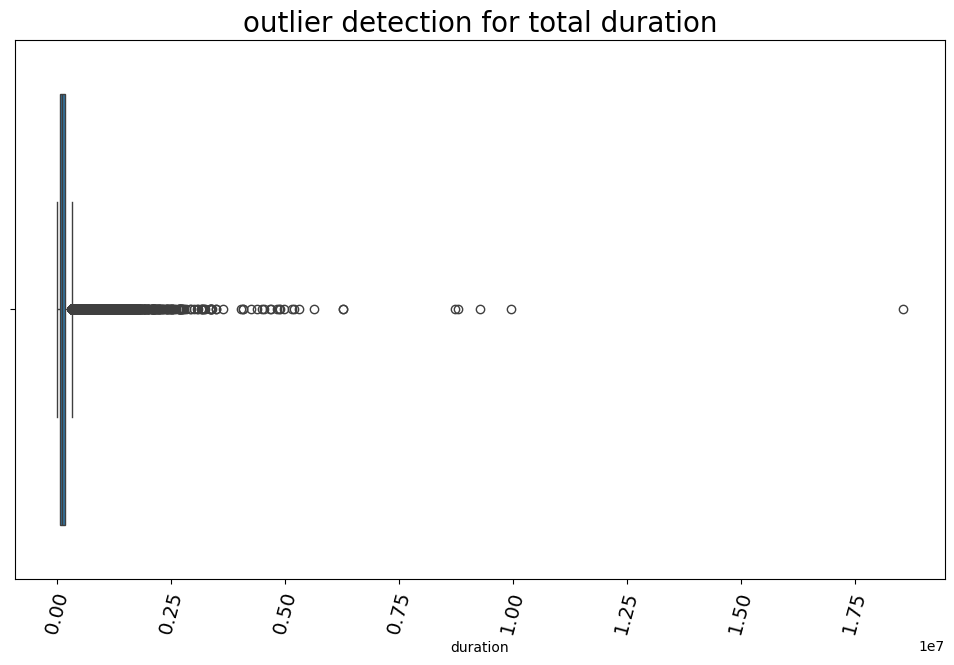

In [17]:
plots.plot_box(engagment_metrics, 'duration', 'outlier detection for total duration')


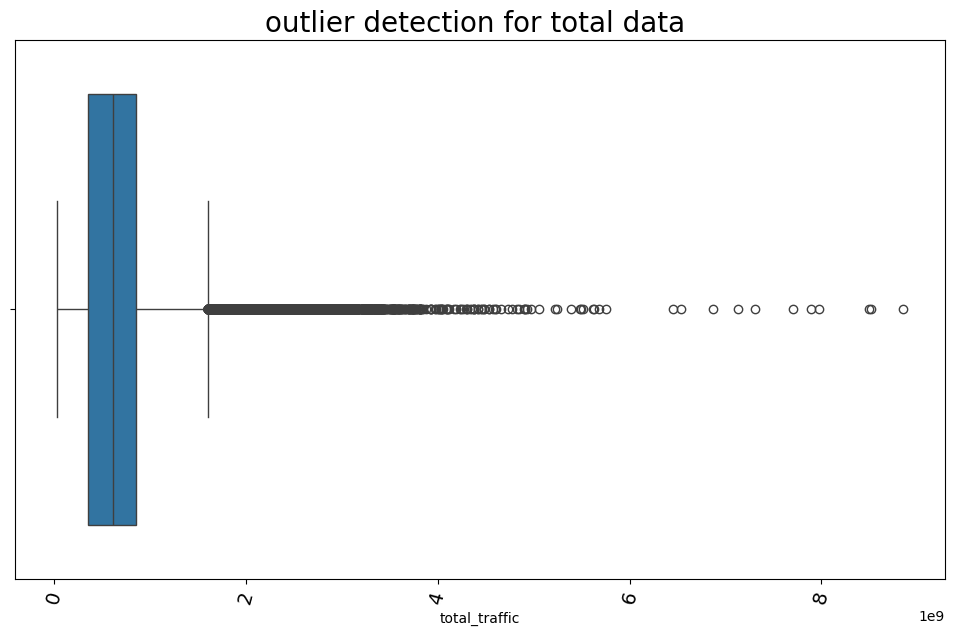

In [18]:
plots.plot_box(engagment_metrics, 'total_traffic', 'outlier detection for total data ')


In [19]:
def handle_outliers(df, col):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [20]:
cleaned_engagment_metrics = handle_outliers(engagment_metrics, 'sessions_frequency')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'duration')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'total_traffic')
cleaned_engagment_metrics.describe()

,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,1.057190e+05
mean,1.356634,130349.580378,6.622830e+08
std,0.650007,87018.309018,3.947117e+08
min,1.000000,7142.000000,3.324901e+07
25%,1.000000,72729.000000,3.579501e+08
50%,1.000000,103111.000000,6.169335e+08
75%,2.000000,172799.000000,8.564738e+08
max,3.500000,322904.000000,1.604259e+09


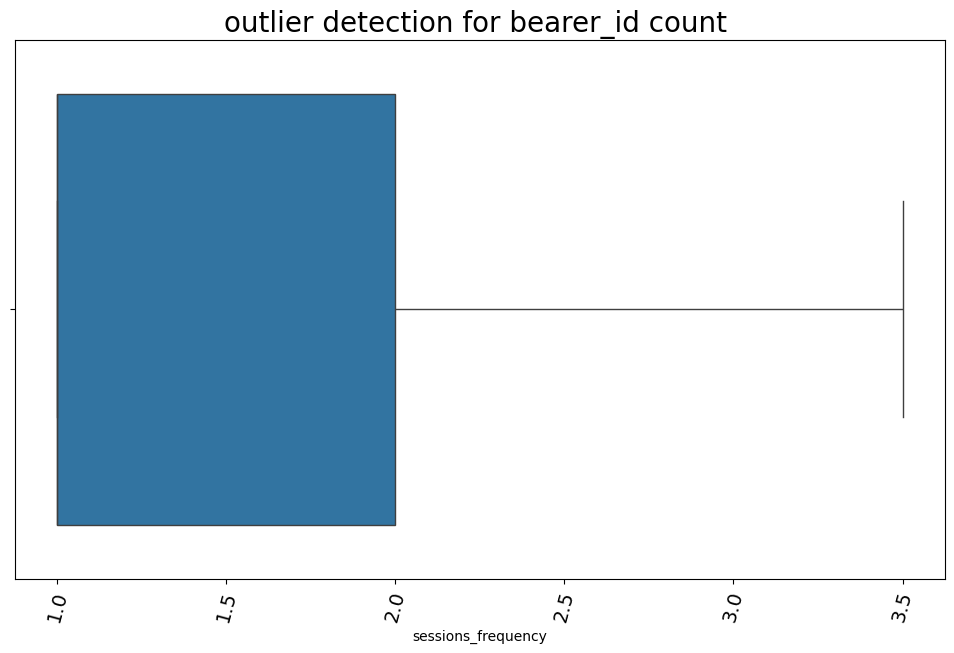

In [21]:
plots.plot_box(cleaned_engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count ')


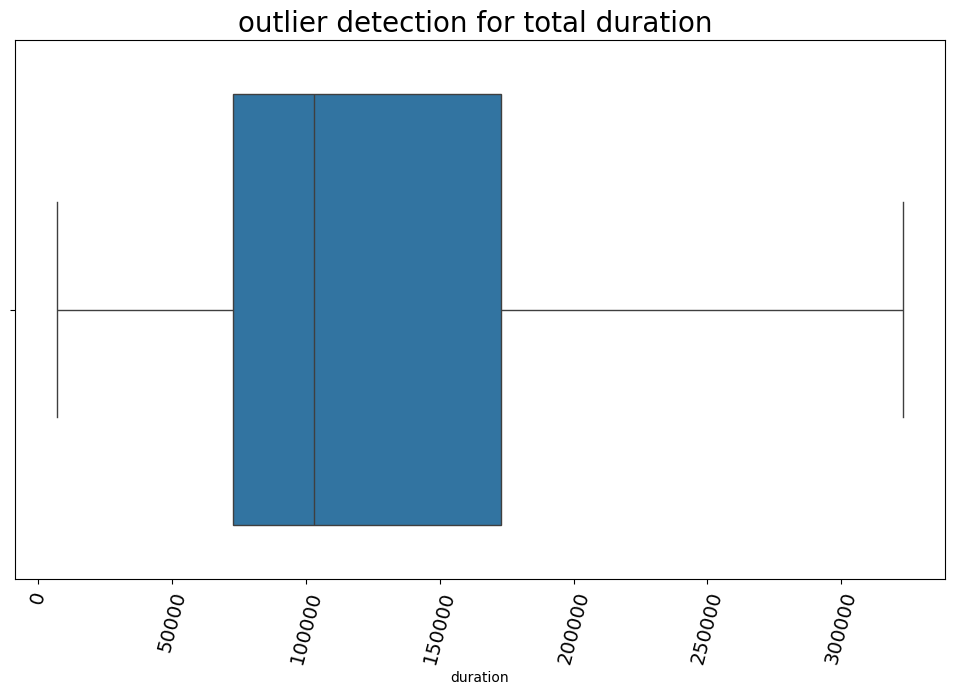

In [22]:
plots.plot_box(cleaned_engagment_metrics, 'duration', 'outlier detection for total duration ')


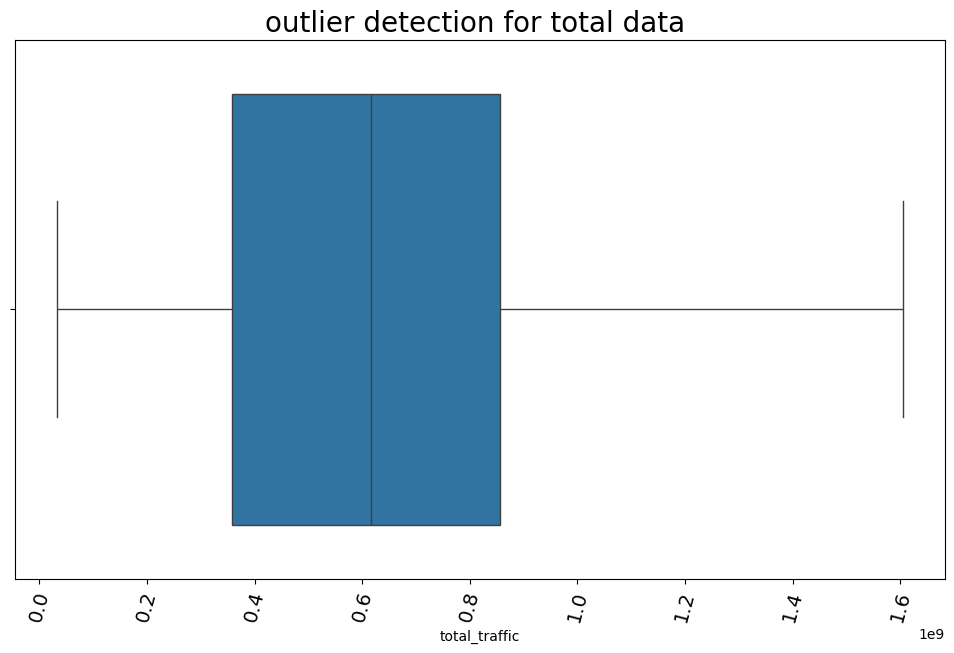

In [23]:
plots.plot_box(cleaned_engagment_metrics, 'total_traffic', 'outlier detection for total data ')


In [24]:
normalized_metrics = scale_and_normalize(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])
normalized_metrics.describe()

,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,0.130161,0.615899,0.654168
std,0.221570,0.260170,0.242921
min,0.000000,0.000000,0.000000
25%,0.000000,0.447434,0.496042
50%,0.000000,0.637558,0.680414
75%,0.327139,0.830555,0.855126
max,0.963529,1.000000,1.000000


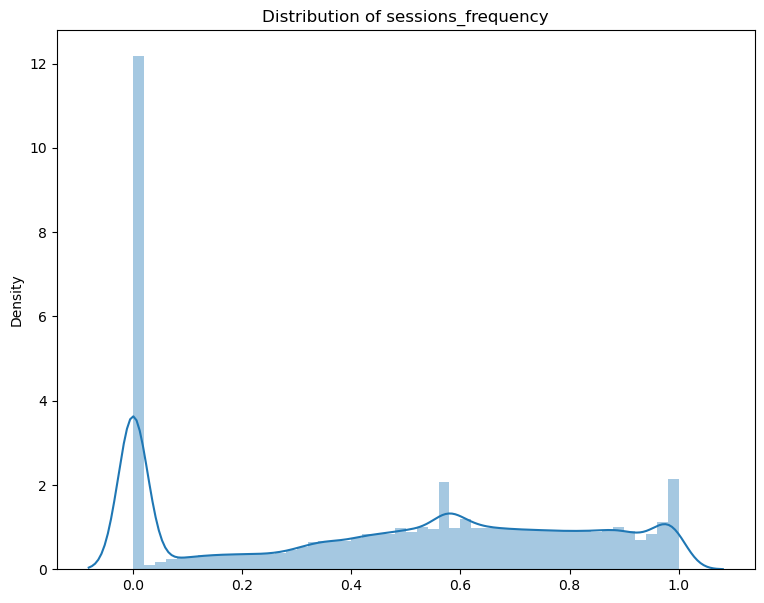

In [25]:
plots.plot_dist(normalized_metrics, 'sessions_frequency',)


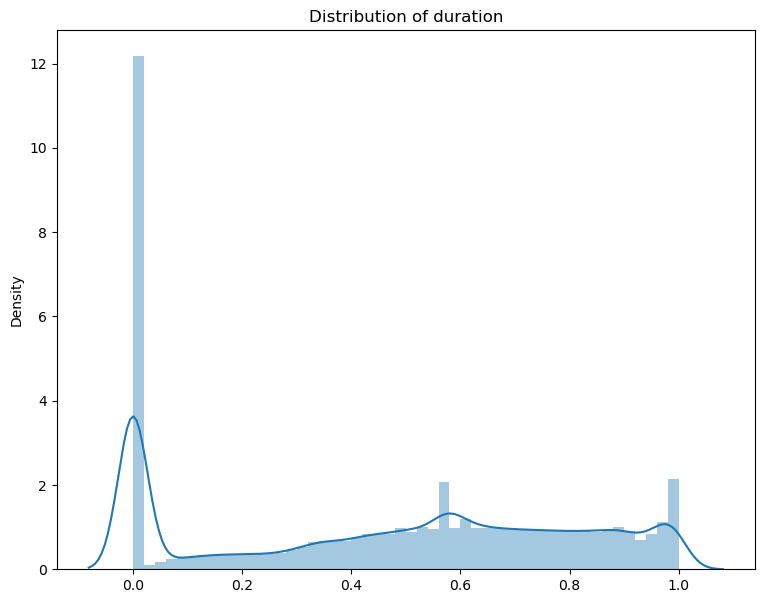

In [26]:
plots.plot_dist(normalized_metrics, 'duration',)


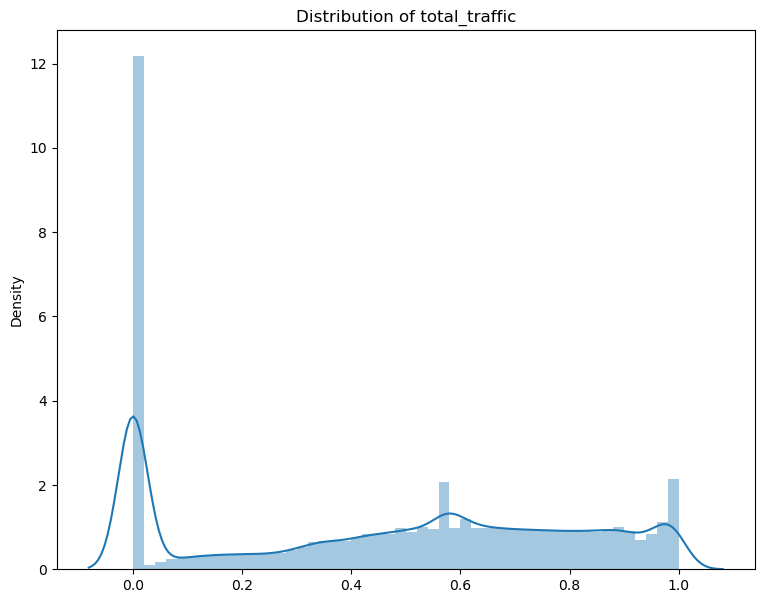

In [27]:
plots.plot_dist(normalized_metrics, 'total_traffic',)


In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster['clusters'] = pred

In [29]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

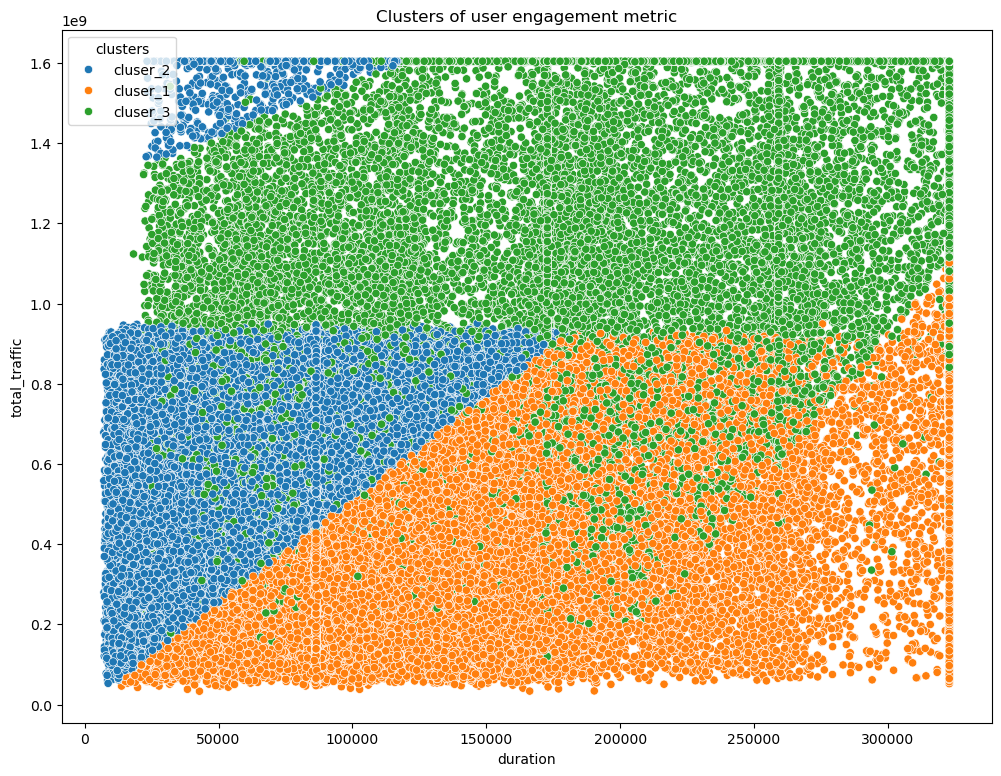

,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,1.057190e+05
mean,1.356634,130349.580378,6.622830e+08
std,0.650007,87018.309018,3.947117e+08
min,1.000000,7142.000000,3.324901e+07
25%,1.000000,72729.000000,3.579501e+08
50%,1.000000,103111.000000,6.169335e+08
75%,2.000000,172799.000000,8.564738e+08
max,3.500000,322904.000000,1.604259e+09


In [30]:
labels = ['cluser_1', 'cluser_2', 'cluser_3']

engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
                                                                                             cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(12,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster).set_title('Clusters of user engagement metric')

plt.show()
engagment_metrics_with_cluster.describe()

In [31]:
print("Describing cluser 1 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 'cluser_1']
cluser_1.describe()

Describing cluser 1 


,sessions_frequency,duration,total_traffic
count,40333.000000,40333.000000,4.033300e+04
mean,1.056852,150067.785486,3.852267e+08
std,0.231562,73348.390166,2.267287e+08
min,1.000000,13755.000000,3.324901e+07
25%,1.000000,87331.000000,1.994996e+08
50%,1.000000,137768.000000,3.432503e+08
75%,1.000000,178375.000000,5.347182e+08
max,2.000000,322904.000000,1.106534e+09


In [32]:
print("Describing cluser 2 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 'cluser_2']
cluser_1.describe()

Describing cluser 2 


,sessions_frequency,duration,total_traffic
count,39598.000000,39598.000000,3.959800e+04
mean,1.015051,64807.472726,6.389159e+08
std,0.121758,37609.034675,2.308700e+08
min,1.000000,7142.000000,5.287081e+07
25%,1.000000,29728.500000,4.939324e+08
50%,1.000000,65069.500000,6.579544e+08
75%,1.000000,86400.000000,7.997048e+08
max,2.000000,182229.000000,1.604259e+09


In [33]:
print("Describing cluser 3 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 'cluser_3']
cluser_1.describe()

Describing cluser 3 


,sessions_frequency,duration,total_traffic
count,25788.000000,25788.000000,2.578800e+04
mean,2.350008,200151.116450,1.131486e+09
std,0.564759,91541.672693,3.679834e+08
min,2.000000,18235.000000,1.197685e+08
25%,2.000000,125054.750000,8.616799e+08
50%,2.000000,188904.000000,1.141411e+09
75%,3.000000,287197.250000,1.475255e+09
max,3.500000,322904.000000,1.604259e+09


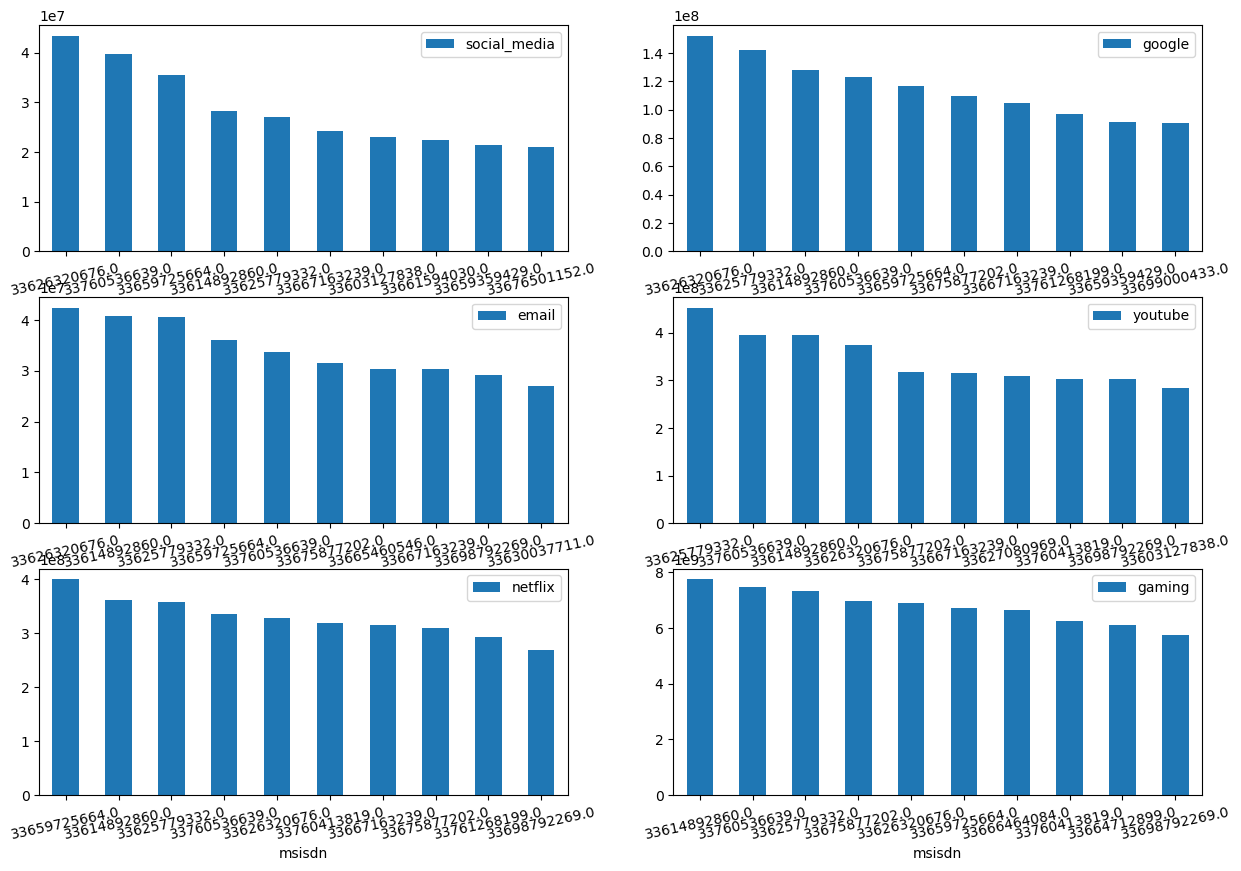

In [34]:
app_metrics = []

app_columns = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']

app_metrics = renamed_df.groupby('msisdn').agg({'social_media': 'sum',
                                        'google': 'sum',
                                        'email': 'sum',
                                        'youtube': 'sum',
                                        'netflix': 'sum', 
                                        'gaming': 'sum'})



figure, axes = plt.subplots(3, 2, figsize=(15,10))

count = 0
for app_metric in app_metrics:
    
    x = app_metrics[[app_metric]].sort_values(by = [app_metric], ascending=False).head(10)
    x.plot.bar(y=app_metric, ax=axes[(count//2), count%2], rot=12)
    count += 1

In [35]:
app_total_df = pd.DataFrame(columns=['app', 'total'])
app_total_df['app'] = app_columns

app_metrics
app_totals = [ ]
for app in app_columns:
    app_totals.append(app_metrics.sum()[app])
app_total_df['total'] =app_totals
    
app_total_df

,app,total
0,social_media,2.684786e+11
1,google,1.146922e+12
2,email,3.318382e+11
3,youtube,3.325905e+12
4,netflix,3.324049e+12
5,gaming,6.321529e+13


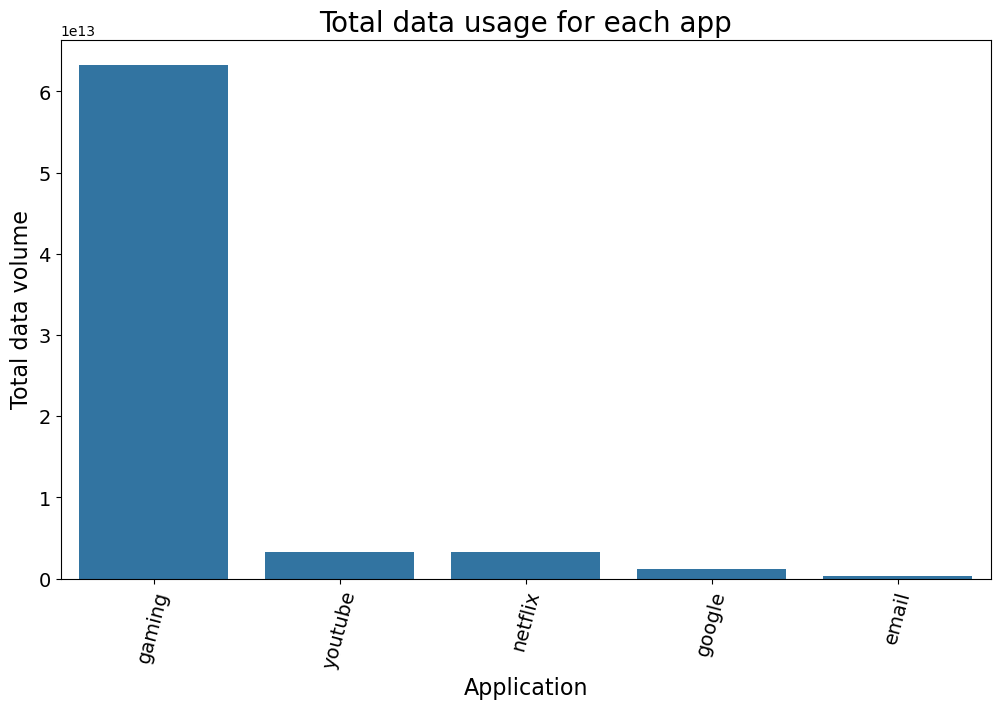

In [36]:
plots.plot_bar(app_total_df.sort_values(by=['total'],
                                  ascending = False).head(),
         x_col='app', y_col='total', title="Total data usage for each app",
         xlabel="Application", ylabel="Total data volume")

In [37]:
cleaned_engagment_metrics


,sessions_frequency,duration,total_traffic
msisdn,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,2.0,37104.0,1.457411e+09
...,...,...,...
3.378997e+10,1.0,160461.0,2.081231e+08
3.378998e+10,2.0,210389.0,1.094693e+09
3.379000e+10,1.0,8810.0,7.146416e+08


In [38]:
inertias = []
for k in range(1, 20):
    
    kmeans = KMeans(n_clusters=k).fit(normalized_metrics)
    inertias.append([k, kmeans.inertia_])

Text(0, 0.5, 'Inertia')

<Figure size 1000x700 with 0 Axes>

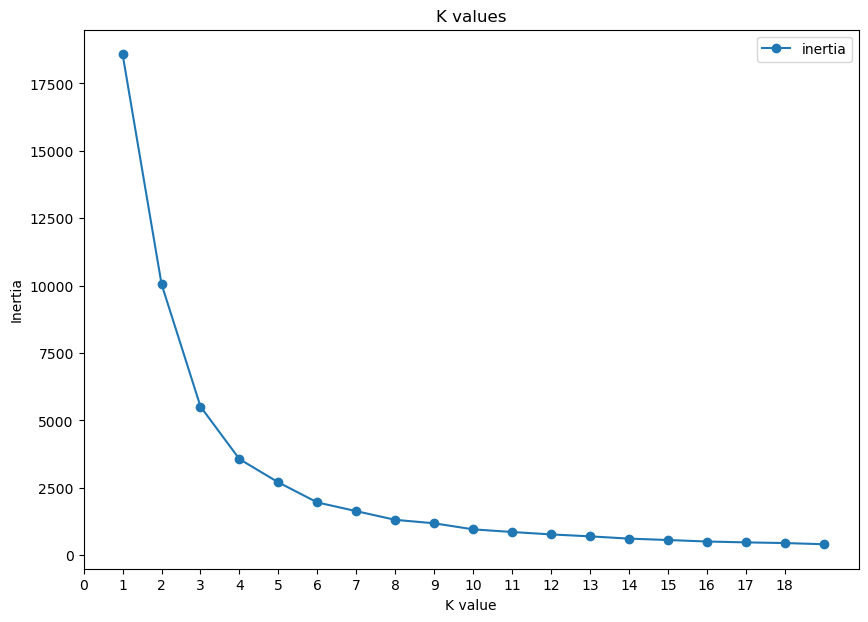

In [39]:
k_df = pd.DataFrame(columns=['k', 'inertia'])
k_df['k'] = [i[0] for i in inertias]
k_df['inertia'] = [i[1] for i in inertias]


plt.figure(figsize=(10,7))

k_df.plot( x='k', y='inertia', linestyle='-',
          marker='o', figsize=(10,7), title='K values').set_xlabel("K values")
plt.xticks(np.arange(len(k_df.index)))
plt.xlabel('K value')
plt.ylabel('Inertia')

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster2 = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster2['clusters'] = pred

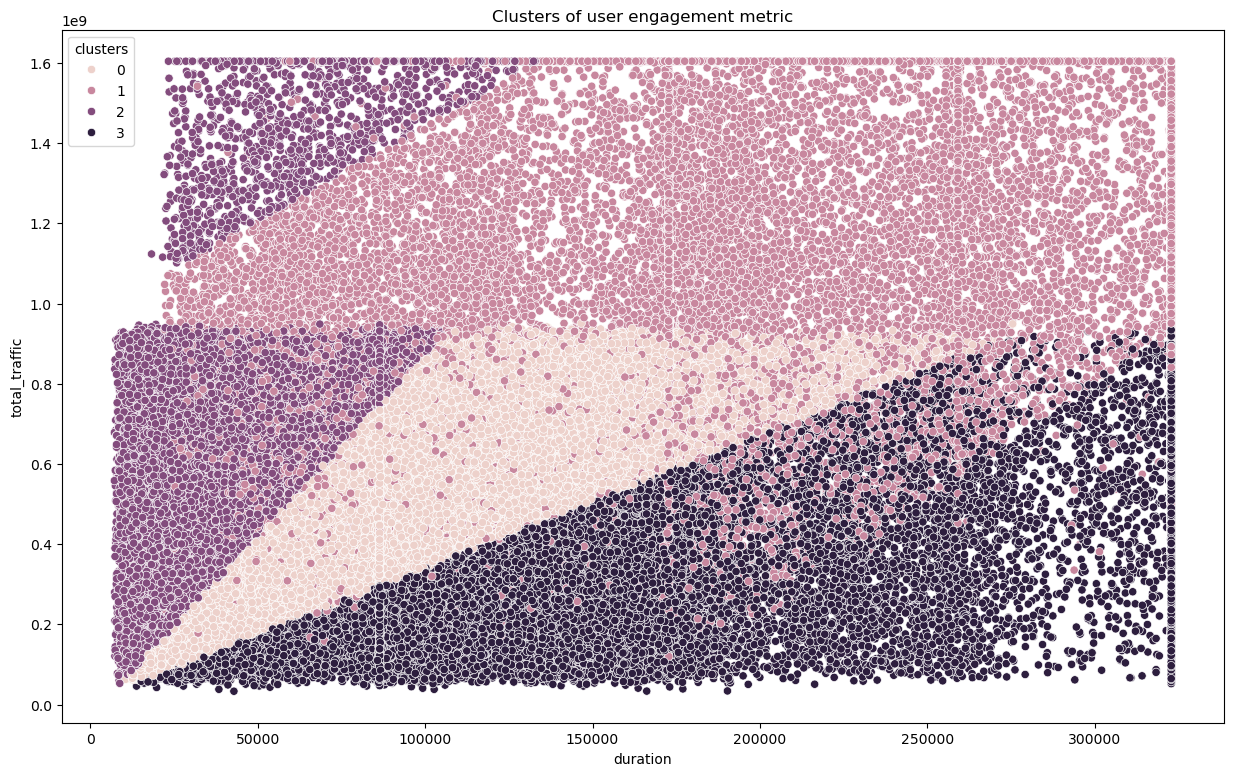

,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,1.057190e+05
mean,1.356634,130349.580378,6.622830e+08
std,0.650007,87018.309018,3.947117e+08
min,1.000000,7142.000000,3.324901e+07
25%,1.000000,72729.000000,3.579501e+08
50%,1.000000,103111.000000,6.169335e+08
75%,2.000000,172799.000000,8.564738e+08
max,3.500000,322904.000000,1.604259e+09


In [41]:
labels = ['cluser_1', 'cluser_2', 'cluser_3', 'cluser_4']

engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
                                                                                             cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()
plt.figure(figsize=(15,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster2).set_title('Clusters of user engagement metric')

plt.show()
engagment_metrics_with_cluster.describe()